In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [2]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [3]:
def idft(N):#returns dft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

In [5]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [6]:
def idcft(N):#returns dcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices: 
        for n in indices:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

In [17]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])/math.sqrt(2)
        return h2
    v=np.log2(N)-1
    hn2=haar(N/2)
    result1=np.concatenate((hn2,hn2),axis=1)
    matrix1=(pow(2,v/2))*np.identity(int(N/2))
    result2=np.concatenate((matrix1,-matrix1),axis=1)
    return np.concatenate((result1,result2),axis=0)
    

In [8]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

In [9]:
def generalised_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=dft(N)
    if transform_type==1:
        gtm=dcft(N)
    if transform_type==2:
        gtm=haar(N)
    return gtm*x    
        
        


In [10]:
def generalised_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X 

In [12]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [13]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [14]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [15]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(2,Xm)
        err=np.append(err,dot_product(x,xm,N))
    return err 

[[ 3.35209035e+01+34.84397344j]
 [-1.18255061e+00 +0.59147086j]
 [ 1.89462916e+00 -4.30336106j]
 [-1.90309575e+00 -0.99525676j]
 [ 6.22940007e-01 -0.29098933j]
 [ 5.36875723e+00 -1.87285064j]
 [-8.30431607e-01 -1.21230678j]
 [ 3.43067114e+00 -0.56607446j]
 [ 9.96009664e-01 -2.76258614j]
 [ 2.29442482e-01 -0.7416802j ]
 [ 8.37791276e-02 +3.9301843j ]
 [-8.38502079e-01 +0.51674337j]
 [-2.08554977e+00 +1.74282022j]
 [ 2.70832720e+00 +0.33965569j]
 [ 4.39051962e+00 +0.92616877j]
 [ 9.99637486e-01 +0.93694245j]
 [ 3.67834808e+00 -0.66011368j]
 [ 7.37591923e-01 -1.7609345j ]
 [ 4.33248391e+00 -0.16291549j]
 [ 5.75720554e+00 -0.21743304j]
 [ 3.31373061e+00 -0.65338939j]
 [ 5.03350891e+00 +1.72447802j]
 [-2.71466248e+00 -1.51779809j]
 [-4.79453367e+00 +4.45751863j]
 [-7.11340716e-01 -2.48487152j]
 [-1.13594544e+00 -1.71072185j]
 [ 1.07500749e+00 +2.30411916j]
 [-2.34659786e+00 +2.44997217j]
 [-8.64985973e-01 -1.28817969j]
 [ 1.26837592e+00 -4.42470254j]
 [-5.30340081e+00 +4.05833503j]
 [-2.119

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(64,)
[[ 2.37028581e+01+24.63840991j]
 [ 3.96276201e-01 -0.09644706j]
 [ 1.13936462e-01 -0.94205753j]
 [-8.51580711e-03 +5.08803327j]
 [-5.73779670e-01 -2.8565103j ]
 [ 3.31233870e+00 -1.08455386j]
 [-2.11452478e+00 -0.58605658j]
 [ 6.89714692e-02 +2.29858354j]
 [ 2.91019466e-01 +2.00625943j]
 [ 1.49631084e+00 +0.66939561j]
 [-5.10515694e-01 -1.18984326j]
 [ 4.86974683e+00 -2.61424483j]
 [-6.25306121e-01 +0.87252615j]
 [-8.03746707e-01 -0.35533878j]
 [-2.49253821e+00 -1.54415447j]
 [ 4.20634544e-01 +1.18255759j]
 [ 5.32025544e+00 +1.03276299j]
 [ 4.34749033e-01 -3.92296777j]
 [-4.04097129e+00 +1.4688848j ]
 [ 1.13696942e+00 -4.45954465j]
 [ 4.99116912e+00 +0.78316762j]
 [ 3.85680625e+00 +1.77910717j]
 [ 6.02216063e-01 +0.55433386j]
 [ 1.26158729e+00 -0.35959002j]
 [ 9.50571676e-01 +2.05832545j]
 [-1.93406635e+00 -1.98770369j]
 [ 6.39337975e+00 +1.69866964j]
 [-8.46386870e-01 -1.70325873j]
 [ 1.49960168e+00 +0.504215j  ]
 [-1.49310575e+00 -0.38679359j]
 [ 3.21578902e+00 +1.49239158j]
 [

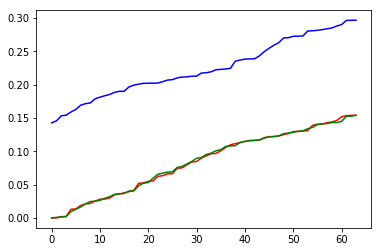

In [18]:
# input sequence generator
length=64
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['r','g','b']
for i in range(0,3,1):
    X=generalised_transform(i,x)
    print(X)
    err=mse(i,x,X,length)
    print(err.shape)
    plt.plot(np.arange(0,length,1),err,color[i])

#y=generalised_inverse_transform(0,X)

